In [2]:
import pandas as pd
df_result = pd.read_csv('final_sentiment_result_new.csv')
df_result.head()

,Unnamed: 0,user_id,created_at,content,like_num,repost_num,comment_num,sentiment
0,0,1681872675,2020-01-20 08:10,发现 满屏 都 是 关于 新冠 肺炎 在 全国 各地 传播 的 新闻 虽 可控 可防 但 还...,0,0,0,-1
1,1,1306052985,2020-01-20 08:21,三条 通报 的 时间 点好 一致 首发 症状 大多 为 发热 咳嗽 胸闷 呼吸困难 这新冠 ...,0,0,0,0
2,2,2218332387,2020-01-20 09:08,关于 最近 很 猖狂 的 新冠型 肺炎 病毒 我们 紧急召开 了 第二届 家庭 会议 ...,0,1,3,0
3,3,2167644005,2020-01-20 13:49,有过 上海 世博会 的 经历 各种 排队 不是 个 事儿 。 有过 非典型 肺炎 的 经验 ...,0,0,0,0
4,4,7339096067,2020-01-20 18:34,星座 仔细 想想 自打 112 土冥合 相 之后 就 没什么 好消息 啊 叹气 更 ...,4,0,7,0


In [3]:
import datetime
df_result['created_at'] =  pd.to_datetime(df_result['created_at'], format='%Y%m%d %H:%M')
df_result['sentiment'] = df_result['sentiment'].astype('float')

In [4]:
data_groupby = df_result.groupby([df_result['created_at'].dt.date])['sentiment'].mean()
data_groupby

created_at
2020-01-20   -0.076923
2020-01-21   -0.090909
2020-01-22   -0.080292
2020-01-23   -0.170051
2020-01-24    0.228022
2020-01-25    0.232852
2020-01-26   -0.024915
2020-01-27    0.191439
2020-01-28    0.368286
2020-01-29   -0.190722
2020-01-30   -0.110294
2020-01-31    0.145408
2020-02-01    0.097166
2020-02-02    0.093023
2020-02-03    0.132743
2020-02-04   -0.244350
2020-02-05    0.146379
2020-02-06   -0.042991
2020-02-07    0.201950
2020-02-08    0.147368
2020-02-09    0.084524
2020-02-10    0.045238
2020-02-11    0.104895
2020-02-12    0.142070
2020-02-13    0.134703
2020-02-14   -0.089800
2020-02-15   -0.210584
2020-02-16    0.127563
2020-02-17    0.153073
2020-02-18   -0.012752
2020-02-19    0.175115
2020-02-20    0.094131
2020-02-21   -0.037820
2020-02-22    0.036655
2020-02-23   -0.168057
2020-02-24   -0.175627
2020-02-25    0.059203
2020-02-26   -0.372549
2020-02-27    0.142857
2020-02-28    0.017486
2020-02-29    0.163823
2020-03-01   -0.068539
2020-03-02    0.116648


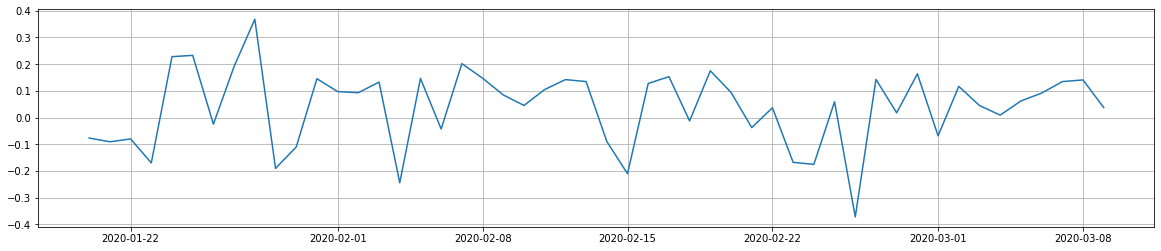

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.plot(data_groupby)
plt.grid()
plt.show()

In [36]:
sentiment_by_userid = df_result.groupby(df_result['user_id'])['sentiment'].mean().to_frame()
sentiment_by_userid['user_id'] = sentiment_by_userid.index
sentiment_by_userid.reset_index(drop=True, inplace=True)
sentiment_by_userid

,sentiment,user_id
0,0.125,75848
1,-1.000,972897
2,1.000,1335280
3,0.000,11171702
4,-1.000,15037826
...,...,...
26057,0.000,7405170342
26058,-1.000,7405334591
26059,0.000,7405564291
26060,0.000,7405680333


In [37]:
import numpy as np
df_user = pd.read_csv('user_all.csv')
df_user = df_user.rename(columns={"_id": "user_id"})
del df_user['Unnamed: 0']
df_user['log_fans_num'] = np.log(df_user['fans_num'])
df_user = df_user.drop_duplicates('user_id')
df_user.head()

,user_id,crawl_time,nick_name,gender,province,city,brief_introduction,birthday,vip_level,tweets_num,follows_num,fans_num,log_fans_num
0,1789413893,1583816648,v1016v,女,河南,焦作,自爱、沉稳、而后爱人,1992-10-16,未开通,205,62,107,4.672829
1,5713325813,1583816658,夕九Florence1996,女,江苏,NaN,此地一为别，孤蓬万里征,1996-08-10,6级,21158,362,160,5.075174
2,2067450395,1583816649,我的肚子有三层肉,女,海外,马耳他,在我面前 你把全世界藏起来了,01-01,未开通,1388,1137,375,5.926926
3,1711539767,1583816664,成都电台经典946,男,四川,成都,成都人民广播电台文化休闲频道-经典946是一个紧扣“经典音乐”，以“文化沉淀”和“休闲生活”...,2005-09-04,未开通,5337,437,62097,11.036453
4,5182129325,1583816655,木么鸽子,女,湖南,湘潭,但行好事，莫问前程。🌸,处女座,1级,487,46,41,3.713572


(array([110., 191., 560., 476., 167., 149., 158., 114.,  41.,  15.]),
 array([ 0.        ,  1.84858949,  3.69717897,  5.54576846,  7.39435794,
         9.24294743, 11.09153691, 12.9401264 , 14.78871588, 16.63730537,
        18.48589486]),
 <a list of 10 Patch objects>)

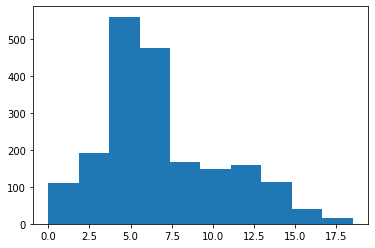

In [39]:
plt.hist(df_user['log_fans_num'])

In [45]:
active_user_sentiment = pd.merge(sentiment_by_userid, df_user, how='inner', on='user_id')
active_user_sentiment = active_user_sentiment[['user_id','fans_num','log_fans_num','sentiment']]
active_user_sentiment.head()

,user_id,fans_num,log_fans_num,sentiment
0,75848,27489,10.221541,0.125000
1,11171702,149,5.003946,0.000000
2,40990135,1009,6.916715,-1.000000
3,70769772,16866,9.733055,0.666667
4,1008912681,185,5.220356,0.000000


Text(0.5, 0, 'log_fans_num')

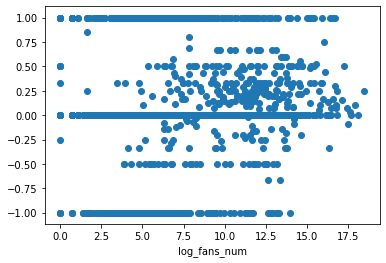

In [49]:
plt.scatter(active_user_sentiment.log_fans_num,active_user_sentiment.sentiment)
plt.xlabel('log_fans_num')

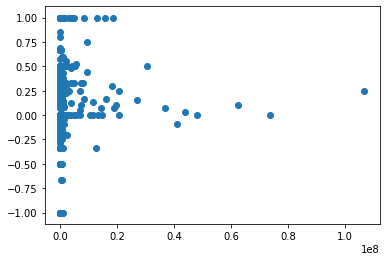

In [48]:
plt.scatter(active_user_sentiment.fans_num,active_user_sentiment.sentiment)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from pyecharts import Map
from pyecharts import Geo

In [4]:
df = pd.read_csv('user_all.csv')
df.drop(['Unnamed: 0','crawl_time','nick_name','gender','city','brief_introduction','birthday','vip_level','tweets_num','follows_num','fans_num'],axis=1,inplace=True)
df.rename(columns={'_id': 'user_id'},inplace=True)

In [5]:
df.head()

,user_id,province
0,1789413893,河南
1,5713325813,江苏
2,2067450395,海外
3,1711539767,四川
4,5182129325,湖南


In [6]:
df_senti = pd.read_csv('final_sentiment_result_new.csv')
df_senti.drop(['Unnamed: 0','like_num','repost_num','comment_num'],axis=1,inplace=True)

In [7]:
df_senti.head()

,user_id,created_at,content,sentiment
0,1681872675,2020-01-20 08:10,发现 满屏 都 是 关于 新冠 肺炎 在 全国 各地 传播 的 新闻 虽 可控 可防 但 还...,-1
1,1306052985,2020-01-20 08:21,三条 通报 的 时间 点好 一致 首发 症状 大多 为 发热 咳嗽 胸闷 呼吸困难 这新冠 ...,0
2,2218332387,2020-01-20 09:08,关于 最近 很 猖狂 的 新冠型 肺炎 病毒 我们 紧急召开 了 第二届 家庭 会议 ...,0
3,2167644005,2020-01-20 13:49,有过 上海 世博会 的 经历 各种 排队 不是 个 事儿 。 有过 非典型 肺炎 的 经验 ...,0
4,7339096067,2020-01-20 18:34,星座 仔细 想想 自打 112 土冥合 相 之后 就 没什么 好消息 啊 叹气 更 ...,0


In [8]:
df_all = pd.merge(df,df_senti,on='user_id')
df_all = df_all[df_all.province.notnull()]
df_all = df_all[(df_all['province']!= '消防救援支队官方微博')&(df_all['province']!= '其他')&(df_all['province']!= '海外')]
df_all['created_at'] =  pd.to_datetime(df_all['created_at'], format='%Y%m%d %H:%M')
df_all['sentiment'] = df_all['sentiment'].astype('float')
df_groupby = df_all.groupby([df_all.province])['sentiment'].mean()

In [9]:
df_all.sentiment.mean()

0.1369024101145792

In [10]:
df_groupby = pd.DataFrame(df_groupby,columns = {'sentiment'})
df_groupby

,sentiment
province,
上海,0.028708
云南,0.126050
内蒙古,0.174419
北京,0.081490
台湾,-0.500000
吉林,0.109091
四川,0.148649
天津,0.142857
宁夏,0.192308


In [11]:
values = df_groupby.sentiment.tolist()
province = df_groupby.index.tolist()
map = Map(" Sentiment by Province", 'China Map', width=1200, height=600)
map.add("sentiment score", province, values, visual_range=[-0.5, 0.6], maptype='china', is_visualmap=True,
        visual_text_color='#001')
map.render(path="sentiment by province.html")